# **Análise de Sentimentos**

Projeto de análise de sentimentos para classificar avaliações de clientes do e-commerce. O objetivo é descobrir se os clientes estão satisfeitos ou insatisfeitos com os produtos que compraram.

# **Explorando e vetorizando dados textuais**

## **Dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/vqrca/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')

In [ ]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [ ]:
df.shape

(15501, 4)

In [ ]:
df.value_counts('sentimento')

,count
sentimento,
positivo,7890
negativo,7611


In [ ]:
print('Positiva \n')

df.avaliacao[0]

Positiva 



'Esse smartphone superou minhas expectativas, recomendo'

In [ ]:
print('Negativa \n')

df.avaliacao[2]

Negativa 



'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

## **Transformando textos em dados numéricos**

In [ ]:
#Bag of words

from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [ ]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [ ]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacoes

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15499,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## **Classificando os sentimentos**

In [ ]:
#Divisão dos Dados

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [ ]:
#Algoritmo de Classificação - Regressão Logistica

from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_teste, y_teste)
print(acuracia)


0.7982456140350878


# **Explorando a frequência e o sentimento das palavras**

## **Visualizando as palavras mais frequentes nas avaliações**

In [ ]:
#Nuvem de palavras

from wordcloud import WordCloud


In [ ]:
todas_palavras = [texto for texto in df.avaliacao]

In [ ]:
todas_palavras = ' '.join([texto for texto in df.avaliacao])


In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

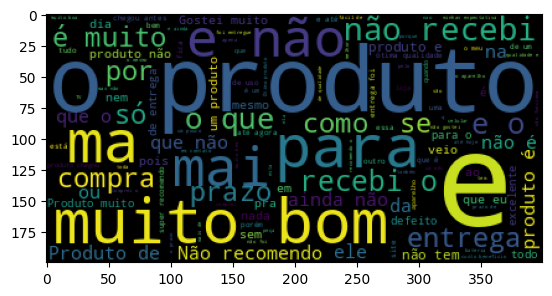

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

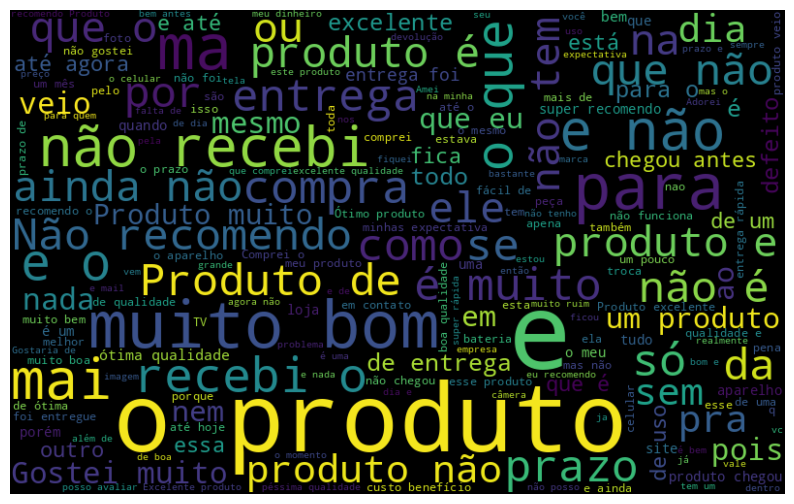

In [ ]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

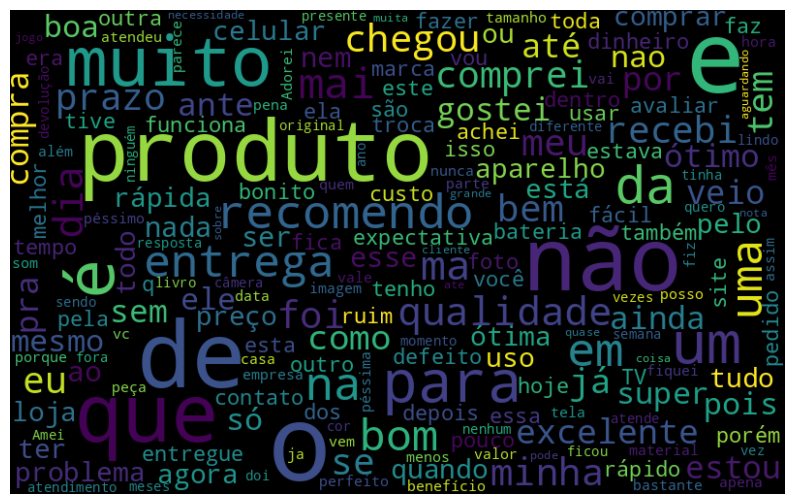

In [ ]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Analisando palavras por sentimento**

In [ ]:
#Filtragem por sentimento

def nuvem_palavras(texto, coluna_texto, sentimento):
  texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

  texto_unido = ' '.join(texto_sentimento)

  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

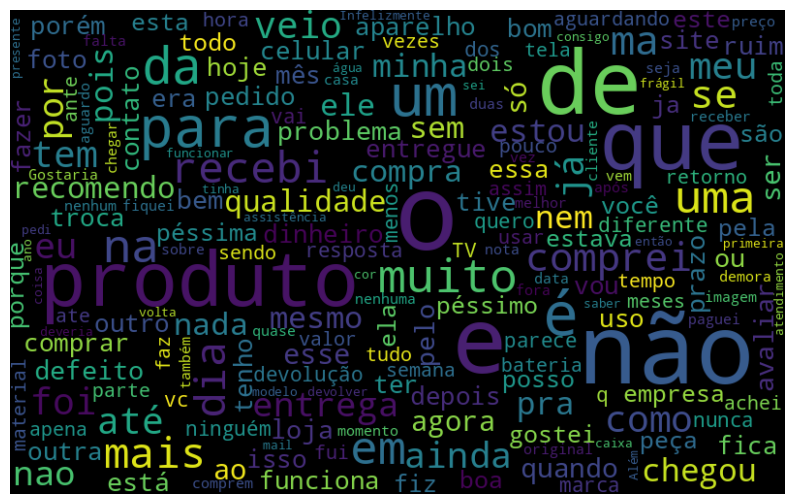

In [ ]:
nuvem_palavras(df, 'avaliacao', 'negativo')

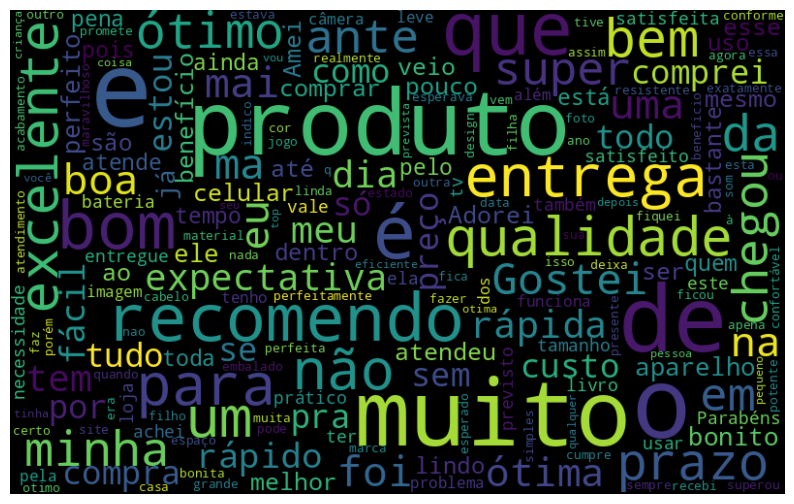

In [ ]:
nuvem_palavras(df, 'avaliacao', 'positivo')

## **Dividindo o texto em unidades menores**

In [ ]:
#Frequência das palavras

todas_palavras

In [ ]:
import nltk
nltk.download('all')

In [ ]:
frases = ['Um produto bom', 'Um produto ruim']

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'Um produto bom': 1, 'Um produto ruim': 1})

In [ ]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


## **Analisando a frequência das palavras**

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)

In [ ]:
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [ ]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [ ]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                            'Frequencia': list(frequencia.values())})

In [ ]:
df_frequencia.head()

,Palavra,Frequencia
0,Esse,101
1,smartphone,33
2,superou,90
3,minhas,533
4,"expectativas,",79


In [ ]:
df_frequencia.nlargest(columns='Frequencia', n=10)

,Palavra,Frequencia
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


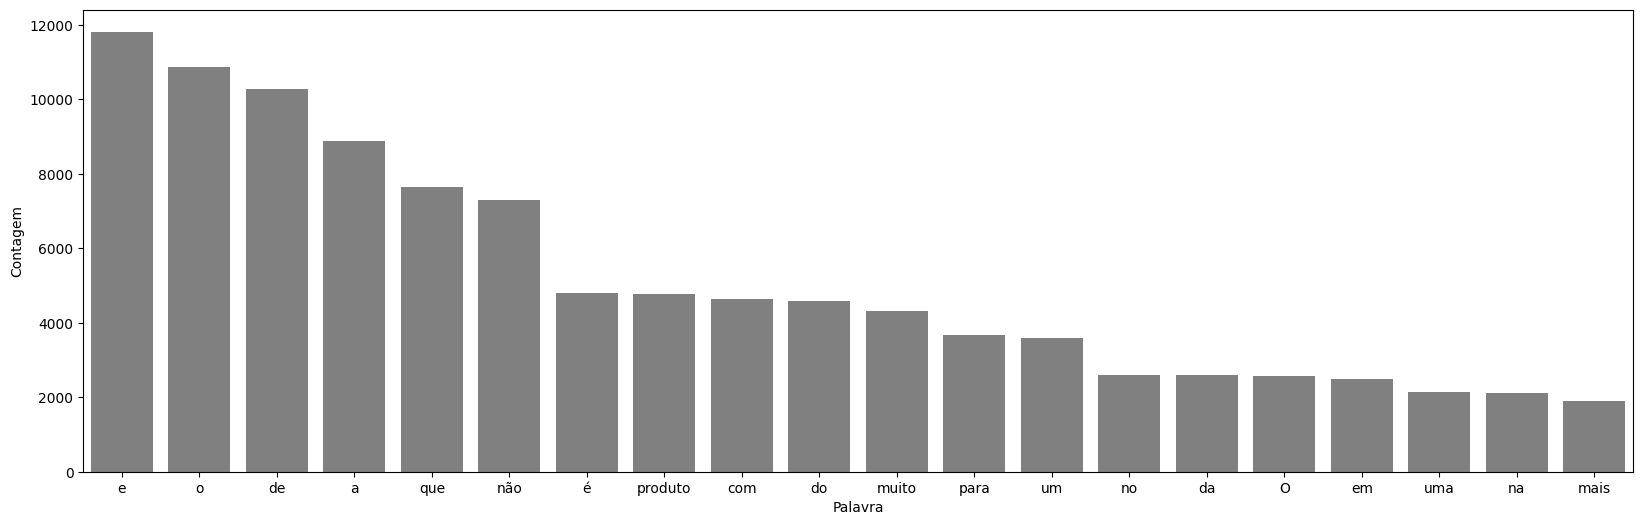

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequencia', n=20), x='Palavra', y='Frequencia', color='gray')
ax.set(ylabel='Contagem')
plt.show()

# **Limpando e normalizando dados textuais**

## **Removendo stopwords**

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [ ]:
palavras_irrelevantes

In [ ]:
frase_processada = []

for opiniao in df.avaliacao:
  palavras_texto = token_espaco.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada

In [ ]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo"
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe..."
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif..."
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo..."


In [ ]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [ ]:
df['tratamento_1'][0]

'Esse smartphone superou expectativas, recomendo'

In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao],random_state=4978)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(X_treino, y_treino)
  acuracia = regressao_logistica.score(X_teste, y_teste)
  return print(f"Acuracia do modelo com '{coluna_texto}': {acuracia * 100: .2f}%")

In [ ]:
classificar_texto(df, 'tratamento_1', 'sentimento')

Acuracia do modelo com 'tratamento_1':  81.09%


In [ ]:
def grafico_frequencia(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
  df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequencia': list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)
  plt.figure(figsize=(20,6))
  ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequencia', color='gray')
  ax.set(ylabel='Contagem')
  plt.show()

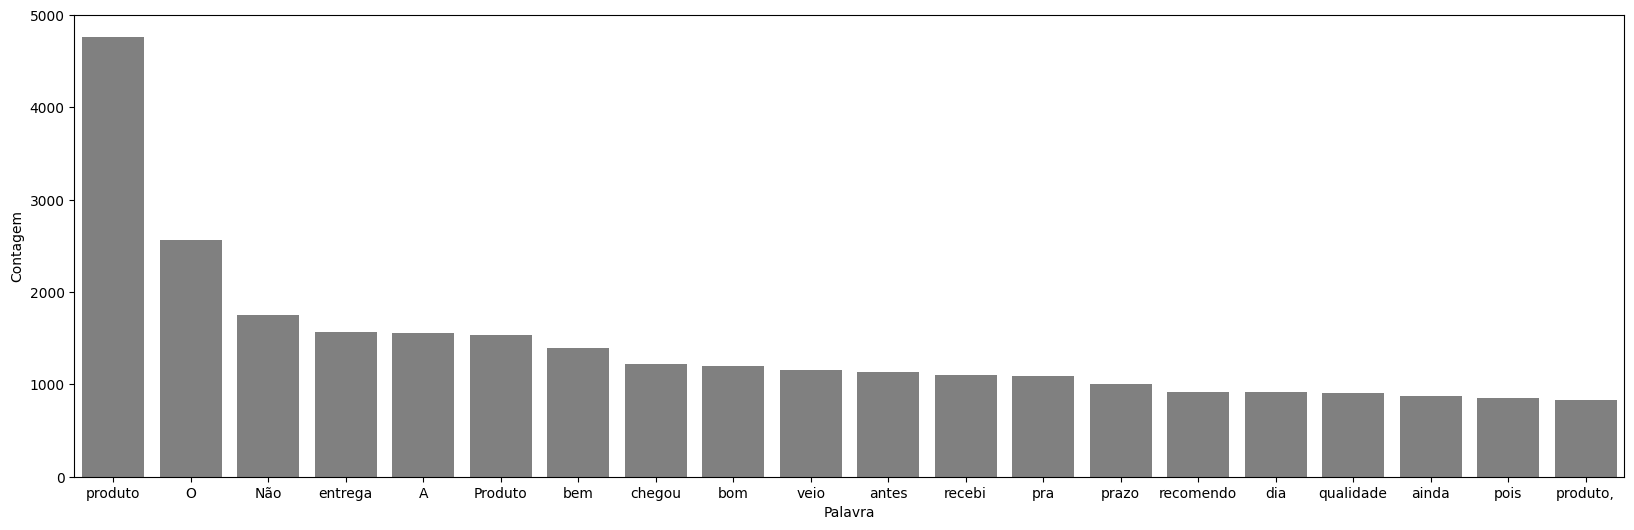

In [ ]:
grafico_frequencia(df, 'tratamento_1', 20)

## **Removendo pontuação**

In [ ]:
frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [ ]:
frase_processada = []

for opiniao in df['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [ ]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...


In [ ]:
df['tratamento_1'][10]

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [ ]:
df['tratamento_2'][10]

'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

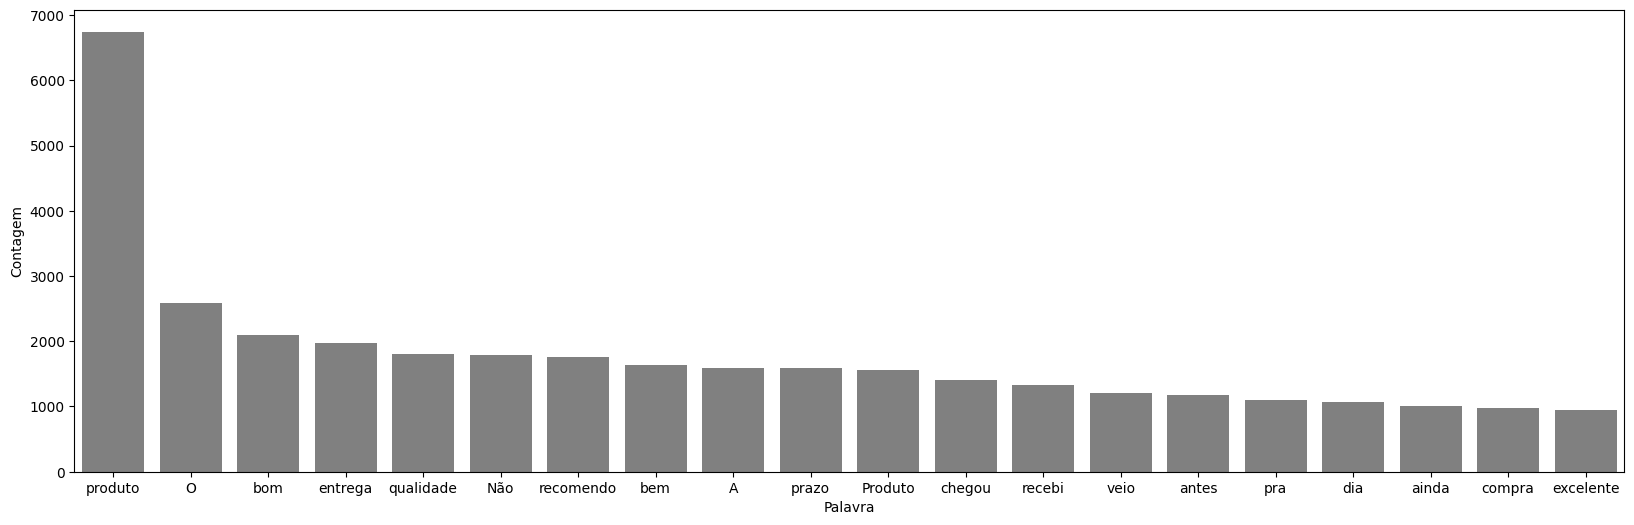

In [ ]:
grafico_frequencia(df, 'tratamento_2', 20)

## **Removendo acentuação**

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
import unidecode

frase = 'Um aparelho ótima performance preço menor outros aparelhos marcas conhecidas performance semelhante'

teste = unidecode.unidecode(frase)
print(teste)

Um aparelho otima performance preco menor outros aparelhos marcas conhecidas performance semelhante


In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [ ]:
df['tratamento_3'] = sem_acentos

frase_processada= []

for opiniao in df['tratamento_3']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [ ]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...


In [ ]:
df['tratamento_2'][70]

'Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos'

In [ ]:
df['tratamento_3'][70]

'Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos'

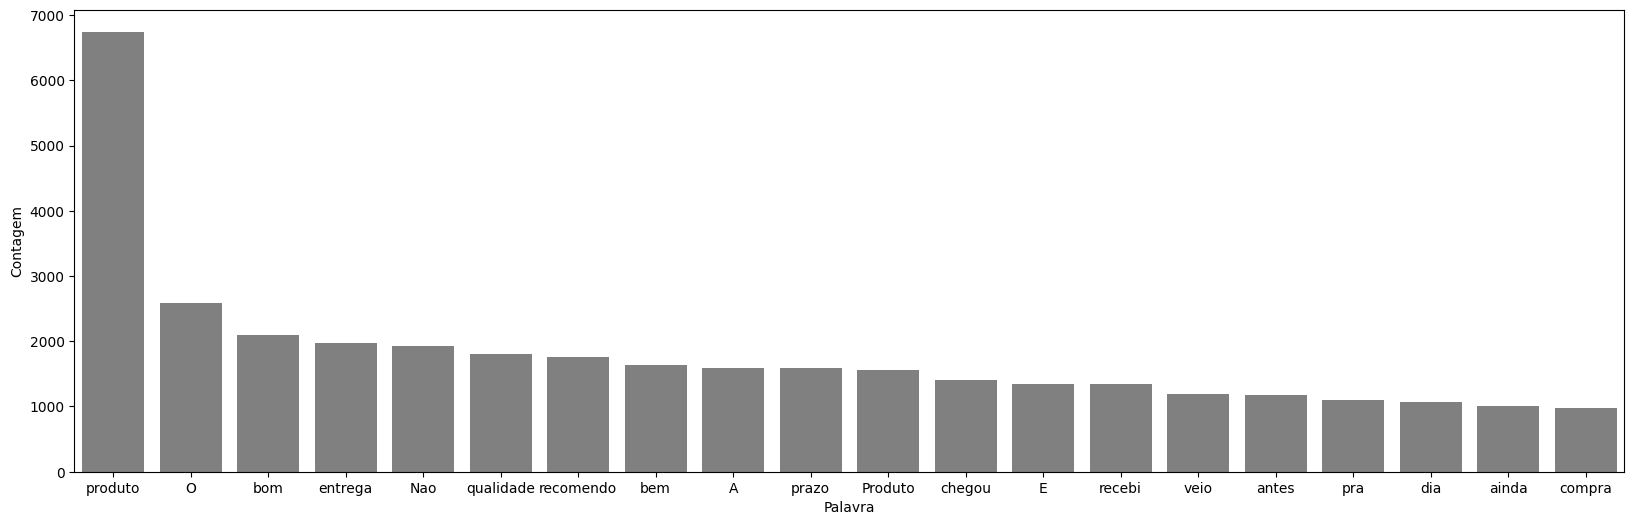

In [ ]:
grafico_frequencia(df, 'tratamento_3', 20)

## **Uniformizando o texto**

In [ ]:
frase = 'Bom produto ptimo custo beneficio Recomendo Confortavel bem acabado'
print(frase.lower())

bom produto ptimo custo beneficio recomendo confortavel bem acabado


In [ ]:
frase_processada = []
for opiniao in df['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [ ]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda recomendoo,cheiro desagradavel pra incomoda recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,fiz compra loja entregou produto compra feita ...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,gostei achei ficou desejar qualidade fotos ach...


In [ ]:
df['tratamento_3'][3]

In [ ]:
df['tratamento_4'][3]

In [ ]:
classificar_texto(df, 'tratamento_1', 'sentimento')

In [ ]:
classificar_texto(df, 'tratamento_4', 'sentimento')

Acuracia do modelo com 'tratamento_5':  83.75%


# **Outras técnicas de processamento de texto**

## **Simplificando as palavras (stemming)**

In [ ]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('gostado')

'gost'

In [ ]:
frase_processada = []

for opiniao in df['tratamento_4']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada

In [ ]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,tratamento_6
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,smartphone superou expectativas recomendo,smartphon super expect recom
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda recomendoo,cheiro desagradavel pra incomoda recomendoo,cheir desagrada pra incomod recomendo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,fiz compra loja entregou produto compra feita ...,fiz compr loj entreg produt compr feit carta c...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,atendeu expectativas achei luz ruim nada dific...,atend expect ach luz ruim nad dificult funcion
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,gostei achei ficou desejar qualidade fotos ach...,gost ach fic desej qual fot ach bem melhor


In [ ]:
df['tratamento_4'][5]

'comprei produto n entrega legal'

In [ ]:
df['tratamento_4'][5]

'compr produt n entreg legal'

In [ ]:
classificar_texto(df, 'tratamento_5', 'sentimento')

Acuracia do modelo com 'tratamento_6':  85.11%


## **Determinando a importância das palavras (TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Comprei um ótimo produto', 'Comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(),
             columns=tfidf.get_feature_names_out())

,Comprei,produto,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [ ]:
tfidf_bruto = tfidf.fit_transform(df['avaliacao'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_bruto * 100: .2f}%')

Acurácia do modelo:  79.54%


In [ ]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_6'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_tratados * 100: .2f}%')

Acurácia do modelo:  85.14%


## **Capturando contextos**

In [ ]:
from nltk import ngrams

frase = 'comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
(list(pares))

[('comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [ ]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_6'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100: .2f}%')

Acurácia do modelo com 50 features e ngrams:  85.22%


In [ ]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_6'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100: .2f}%')

Acurácia do modelo com 100 features e ngrams:  88.26%


In [ ]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_6'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100: .2f}%')

Acurácia do modelo com 1000 features e ngrams:  91.85%


In [ ]:
# tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
# vetor_tfidf = tfidf.fit_transform(df['tratamento_6'])
# X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
# regressao_logistica.fit(X_treino, y_treino)
# acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
# print(f'Acurácia do modelo com todas as features e ngrams: {acuracia_tfidf_ngrams * 100: .2f}%')

Acurácia do modelo com todas as features e ngrams:  91.85%


In [ ]:
vetor_tfidf.shape

(15501, 114123)

In [ ]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)

In [ ]:
pesos.nlargest(50, 0)

,0
otim,7.781088
excel,7.430921
bom,5.996893
perfeit,5.086188
ador,5.050502
satisfeit,4.841244
rap,4.109015
lind,3.774459
ame,3.513963
maravilh,3.490755


In [ ]:
pesos.nsmallest(50,0)

,0
pess,-4.644158
ruim,-4.068716
receb,-4.062899
frac,-3.716810
horri,-3.379785
fragil,-3.038980
defeit,-3.036871
devolv,-2.935014
decepcion,-2.896531
dinh,-2.701120


# **Modelo de Classificação**

## **Salvando e carregando o modelo**

In [ ]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [ ]:
#Carregar o modelo (deserização)

tfidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

# **Pre-processamento de Dados novos**

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()


def processar_avaliacao(avaliacao):
  #passo 1
  tokens = token_pontuacao.tokenize(avaliacao)

  #passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

  #passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

  #passo 4
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

  #passo 5
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

  return ' '.join(frase_processada)

## **Classificando novas avaliações**

In [ ]:
# Novas avaliações para prever
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                 "A entrega atrasou muito! Estou decepcionado com a compra",
                 "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo",
                 "Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.",
                 '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
                 Mas, no fim, deu tudo certo e recebi o produto.Produto de ótima qualidade, atendendo bem as minhas necessidades e por
                 um preço super em conta.Recomendo.''']

In [ ]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [ ]:
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [ ]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'avaliação': novas_avaliacoes,
    'sentimento_previsto': predicoes
    })
df_previsoes

,avaliação,sentimento_previsto
0,"Ótimo produto, super recomendo!",positivo
1,A entrega atrasou muito! Estou decepcionado co...,negativo
2,Muito satisfeito com a compra. Além de ter ate...,positivo
3,Horrível!!! O produto chegou danificado e agor...,negativo
4,"Rastreando o pacote, achei que não fosse receb...",positivo


## **Novos Dados (iogurte proteico)**

In [ ]:
df_novo = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/novas_avaliacoes.csv')
df_novo.head()

,ID_avaliacao,avaliacao
0,8558,Até que o sabor é bom. Muito melhor que tomar ...
1,3553,"Nossa sério, absurdo, compro o produto com rec..."
2,5590,Bom custo benefício
3,6617,Saboroso e nutritivo. Tem me salvado nos dias ...
4,7987,"Fiquei decepcionada com a situação, a embalage..."


In [ ]:
novas_avaliacoes = df_novo['avaliacao']

In [ ]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [ ]:
novas_avaliacoes_processadas

['sab bom melhor tom whey val pen lanch cei dia corr',
 'seri absurd compr produt recorrenc dess vez sent gost estranh rep assim compr venc vei lev venc desd marc send entreg pra mim julh',
 'bom cust benefici',
 'sabor nutri salv dia corr trabalh da faz lanch ajud bast trein',
 'fiq decepcion situaca embal cheg total encharc deix mercad port condomini chei formig embal derret unidad estour rest derret poi embal produt papela total impropri consum',
 'unidad pacot vei fur vaz tod gelad',
 'compr junh produt venc marc',
 'gent cheg tod cert tav med vir falt quas praz validad vei tud perfeit dentr praz bem embal tud tranquil recom demal',
 'gost dess produt otim qual prec bom compar vem merc',
 'produt vei quant ped aind vei dat validad prox quer reembols dess compr',
 'tod vier venc mes atr']

In [ ]:
novas_avaliacoes_processadas[0]

'sab bom melhor tom whey val pen lanch cei dia corr'

In [ ]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'avaliação': novas_avaliacoes,
    'sentimento_previsto': predicoes
    })
df_previsoes

,avaliação,sentimento_previsto
0,Até que o sabor é bom. Muito melhor que tomar ...,positivo
1,"Nossa sério, absurdo, compro o produto com rec...",negativo
2,Bom custo benefício,positivo
3,Saboroso e nutritivo. Tem me salvado nos dias ...,positivo
4,"Fiquei decepcionada com a situação, a embalage...",negativo
5,Uma unidade do pacote veio furada e vazou em t...,negativo
6,Comprei em junho mas o produto venceu em março,negativo
7,"Gente, o meu chegou todo certinho, eu tava com...",positivo
8,"Gosto muito desse produto, ótima qualidade, e ...",positivo
9,Esse produto veio na quantidade que eu não ped...,negativo
